In [1]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import MigPreFuncoes
import SlantStack_v2

Imported MigPreFuncoes now
Imported SlantStack_v2


In [2]:
importlib.reload(MigPreFuncoes)
importlib.reload(SlantStack_v2)

Imported MigPreFuncoes now
Imported SlantStack_v2


<module 'SlantStack_v2' from 'C:\\Users\\guilh\\Desktop\\Code\\SeismicDiffractions\\SlantStack_v2.py'>

In [3]:
dx=1.0 #(m) Discretização em X
dz=1.0 #(m) Discretização em Y
nz=120 #Tamanho do Grid em Z
ntr=nx=240 #Tamanho do Grid em X
c=250 #m/s

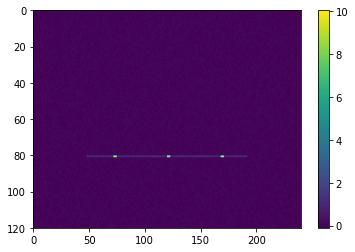

In [4]:
MOD = np.zeros([ntr,nz])

#Barra
x_ini_1 = int(np.round(1*ntr/5))
x_fim_1 = int(np.round(4*ntr/5))

#Pontos Difratores
for i in range(x_ini_1,x_fim_1):
    z = int(np.round(nz*2/3))
    MOD[i,z]=1
MOD[int(np.round(1.5*nx/5)):int(np.round(1.5*nx/5+3)),z]=10
MOD[int(np.round(2.5*nx/5)):int(np.round(2.5*nx/5+3)),z]=10
MOD[int(np.round(3.5*nx/5)):int(np.round(3.5*nx/5+3)),z]=10

#Adicionando ruído no modelo
nn = np.random.rand(ntr,nz)
MOD = MOD+(nn-0.5)*0.2

R = MOD.T

plt.imshow(MOD.T, aspect="auto", extent=[0,dx*ntr,nz*dz,0])
plt.colorbar()
plt.show()

In [5]:
# Detectando as inclinações presentes no modelo
#pmin=-3
#pmax=3
#dp=0.1
#
#S,pmaxS,taumaxS,smax,ip,itau = SlantStack.slant_stack(pmin,pmax,dp,0,nz*dz,dz,MOD.T,dx,dz,0,0)
#
#plt.imshow(S,extent=[pmin,pmax,nz*dz,0],aspect="auto")
#plt.colorbar()
#plt.xlabel('p')
#plt.ylabel('tau')
#plt.show()

In [6]:
#t1 = np.degrees(np.arctan(pmaxS))
#print("pmax MOD1 =", pmaxS)
#print(f"theta 1 = {t1} graus")

(120, 240)


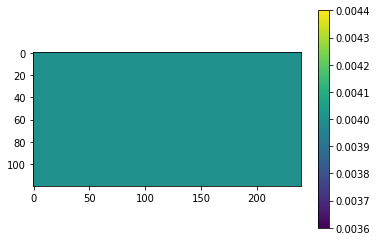

In [7]:
#Modelo de Vagarosidade SW
#c = 250
# Checar pq não estamos calculando tmax antes dessa célula
SW=np.ones([nz,ntr])*1/c
print(SW.shape)

plt.imshow(SW)
plt.colorbar()
plt.show()

In [8]:
#Tabela de tempo de trânsito do modelo de vagarosidade SW

#TT=MigPreFuncoes.raymodel3(SW,dx,ntr,"Data/time_table_barra.npy")

TTh.shape=(240, 120, 240)


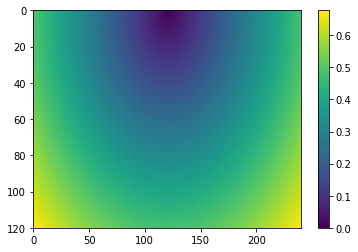

TSX.shape=(120, 240)


In [9]:
with open('Data/time_table_barra.npy', 'rb') as f:
    TTh = np.load(f)

print(f"TTh.shape={TTh.shape}")

dt=0.004

TSX = (TTh[120,:,:])  # Traveltime  (indexes)
plt.imshow(TSX,extent=[0, ntr*dx, nz*dz, 0], aspect='auto')
plt.colorbar()
plt.show()

timer=np.round(TTh/dt)+1

print(f"TSX.shape={TSX.shape}")

In [10]:
dt=0.004
print(1/2/dt)

125.0


2.146625258399798


Text(0.5, 0, 's')

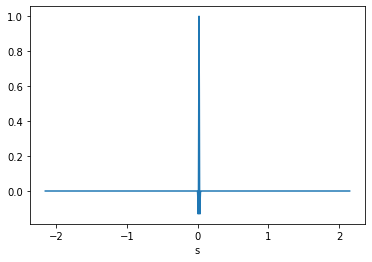

In [11]:
#Wavelet

fr=40 #Hz
nps=200 #era 200, mudei pra 136 e funcionou, 
#       #tenho que conferir se posso fazer isso mesmo...
dt=.004 #s
rick=MigPreFuncoes.ricker(nps,fr,dt)

#sx=10  #index position
#sz=0  #index position

# Tempo de ida e volta até o fundo do modelo
tmax = np.sqrt((dx*nx)**2+(dz*nz)**2)*2/c
nt=int(np.ceil(tmax/dt+1))
print(tmax)
#nd2=nt+1; 



W=np.zeros(2*nt);
W[nt:nt+nps-1]=rick[0:nps-1]


plt.plot(np.arange(-nt*dt,nt*dt,dt),W)
plt.xlabel('s')

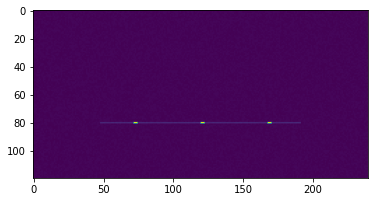

In [12]:
nx=ntr

#Modelo:
R = MOD.T

plt.imshow(R)
plt.show()

In [13]:
######### PAREI AQUI!!!!! RODAR ISSO AQUI!!!!!!

In [13]:
#Creating the synthetic csg

dsx = 1
nsx = nx
ngx = nx
path = "Data/CSG_diffbar/barra_gather_shot"

#files = MigPreFuncoes.kirchoffModeling(nsx,ngx,dsx,nx,nt,dt,TTh,R,W,path)

In [14]:
#plt.imshow(np.diff(D[:,:],n=2,axis=0),aspect='auto',extent=[0, nx*dx, nt*dt, 0])
#plt.imshow(np.diff(D[:,:],n=2,axis=0),aspect='auto',interpolation='bilinear', 
#           extent=[0, nx*dx, nt*dt, 0])
#plt.xlabel('Distancia (m)')
#plt.ylabel('Tempo (s)')
##plt.ylim([1.0,0])
#plt.show()

In [15]:
files = []

for i in range(240):
    filename = 'Data/CSG_diffbar/barra_gather_shot_{}'.format(i)
    #print(i,filename)
    with open(filename, 'rb') as file:
        (gather) = np.load(file)
        files.append(gather)
        
len(files)

240

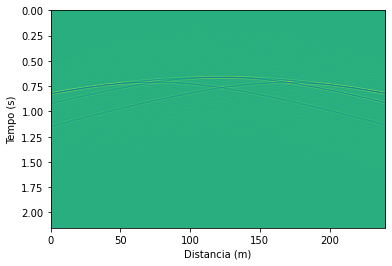

In [16]:
plt.imshow(files[120],aspect='auto',extent=[0, nx*dx, nt*dt, 0])

plt.xlabel('Distancia (m)')
plt.ylabel('Tempo (s)')
#plt.ylim([0.4,0])
plt.show()

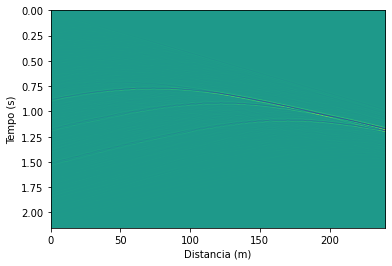

In [17]:
G2=MigPreFuncoes.phase_shift(files[1])
plt.imshow(G2,aspect='auto',extent=[0, nx*dx, nt*dt, 0])

plt.xlabel('Distancia (m)')
plt.ylabel('Tempo (s)')
#plt.ylim([0.4,0])
plt.show()

538


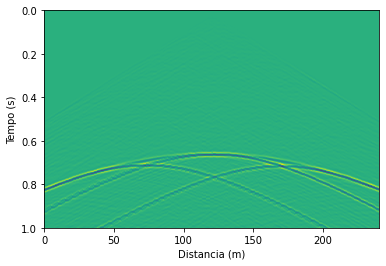

In [18]:
shot = 120
filename = 'Data/CSG_diffbar/barra_gather_shotCenter{}'.format(int(shot))

with open(filename, 'rb') as file:
    gather1t = np.load(file)

#nt=500
print(nt)
gather1=gather1t[0:nt,:]
win=20*dt
dwin=dt
app=15
isx=shot


plt.imshow(gather1,aspect='auto',extent=[0, nx*dx, nt*dt, 0])
plt.ylim([1,0])
plt.xlabel('Distancia (m)')
plt.ylabel('Tempo (s)')
plt.show()

# Slant Stack

In [19]:
#Transformar em célula de código se não tiver o aruivo salvo localmente

pmin = -1
pmax = 1
dp = 0.1
xwin=zwin=30
dx=dz=1
x_ini=z_ini=0

pm,sm = SlantStack_v2.local_window(MOD.T,xwin,zwin,x_ini,z_ini,dx,dz,pmin,pmax,dp)

with open("Data/CSG_diffbar/barra_dipfield", "wb") as f:
    np.save(f,pm)

100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [02:39<00:00,  1.33s/it]


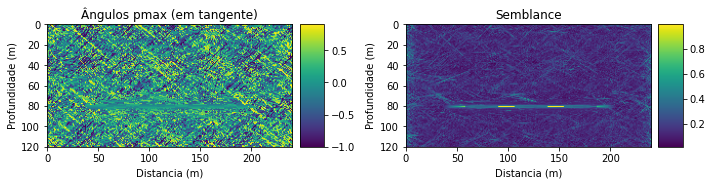

In [20]:
with open("Data/CSG_diffbar/barra_dipfield", "rb") as f:
    tst = np.load(f)

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(121)
ax1.set_title("Ângulos pmax (em tangente)")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")
im1 = ax1.imshow(tst,extent=[0, nx*dx, nz*dz, 0])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im1, cax=cax, orientation='vertical')


ax2 = fig.add_subplot(122)
ax2.set_title("Semblance")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")
im2 = ax2.imshow(sm,extent=[0, nx*dx, nz*dz, 0])
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im2, cax=cax, orientation='vertical')

plt.tight_layout()
plt.show()

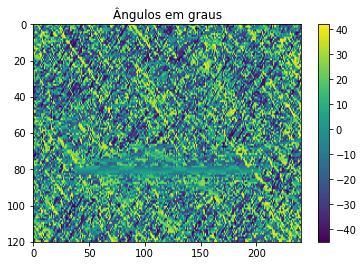

In [21]:
m_theta = np.degrees(np.arctan(tst))
plt.imshow(m_theta,extent=[0, ntr*dx, nz*dz, 0], aspect="auto")
plt.title("Ângulos em graus")
plt.colorbar()
plt.show()

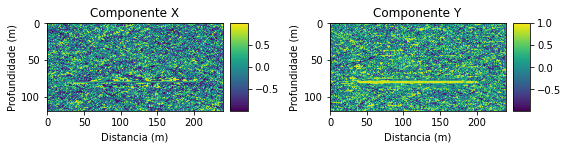

In [22]:
X = np.sin(m_theta)
Y = np.cos(m_theta)

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(121)
ax1.set_title("Componente X")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")
im1 = ax1.imshow(X)
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im1, cax=cax, orientation='vertical')


ax2 = fig.add_subplot(122)
ax2.set_title("Componente Y")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")
im2 = ax2.imshow(Y)
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im2, cax=cax, orientation='vertical')

plt.tight_layout()
plt.show()

Imported MigPreFuncoes now
1 1
120 1 1 0.004 0.04 0.004 40
gather shape is  (536, 240)
TTh shape is  (240, 120, 240)


100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [01:23<00:00,  2.89it/s]


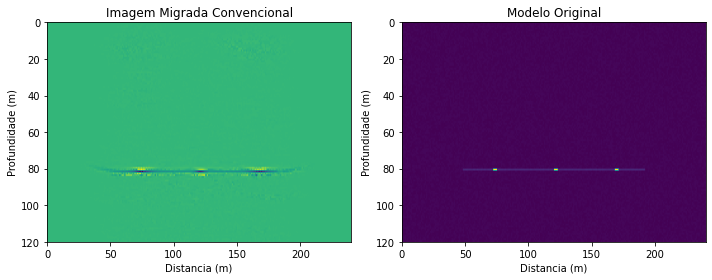

In [23]:
import importlib
#import MigPreFuncoes
importlib.reload(MigPreFuncoes)

print(dx,dz)
win=10*dt #(metade)janela em tempo em cada etapa
dwin=dt

app=40 # abertura em traços

print(isx,dx,dz,dt,win,dwin,app)
print('gather shape is ', gather.shape)
print('TTh shape is ', TTh.shape)
epsilon=1.0  # frequency dependent
mig_winapp = MigPreFuncoes.migvsp_winapp(gather1,isx,dx,dz,dt,
                                         win,dwin,app,TTh,X,Y, epsilon)


fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.imshow(mig_winapp, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada Convencional")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(R, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Modelo Original")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

In [24]:
#falta rodar a partir daqui

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [01:21<00:00,  2.95it/s]


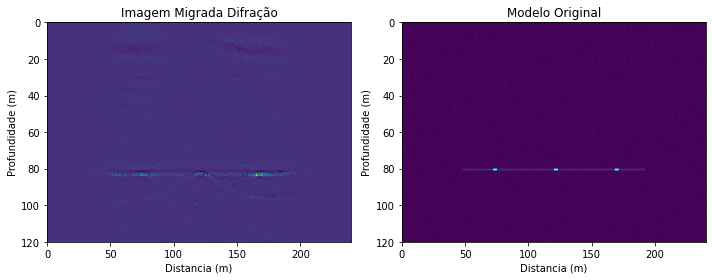

In [25]:
mig_diff = MigPreFuncoes.migvsp_winapp_diff(gather1,isx,dx,dz,dt,win,dwin,app,TTh,X,Y,epsilon)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.imshow(mig_diff, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada Difração")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(R, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Modelo Original")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

In [27]:
#Stack

mig_stack = MigPreFuncoes.migstack_winapp(files,isx,dx,dz,dt,win,dwin,app,TTh,X,Y,epsilon)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.imshow(mig_stack, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(R, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Modelo Original")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:
mig_stack_diff = MigPreFuncoes.migstack_winapp_diff(files,isx,dx,dz,dt,win,dwin,app,TTh,X,Y,epsilon)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.imshow(mig_stack_diff, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(R, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Modelo Original")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()